In [2]:
import pandas as pd

data = pd.read_csv("../../data/hotel_bookings.csv")

# Limpiar base de datos

In [3]:
def drop_dtypes_object(df: pd.DataFrame)->pd.DataFrame:
    dict_dtypes = dict(df.dtypes)
    columns2drop = []
    for dtype in dict_dtypes:
        column_type = dict_dtypes[dtype]
        if column_type == "object":
            columns2drop.append(dtype)
    return data.drop(columns2drop, 1)


def drop_nans(df: pd.DataFrame)->pd.DataFrame:
    columns2drop = []
    for column in df.columns:
        column_data = df[column]
        isna_cd = column_data.isna()
        if isna_cd.describe()["top"]:
            columns2drop.append(column)
        else:
            df[column] = df[column].fillna(0)
    return df.drop(columns2drop, 1)


In [4]:
data = drop_nans(drop_dtypes_object(data))


# Funciones para entender el significado de la información

## head()

In [5]:
data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


## shape

In [6]:
data.shape

(119390, 19)

## dtypes

In [7]:
data.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

## describe()

In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## groupby()

In [9]:
data_group = data.groupby(["is_canceled"]).mean()

# Funciones para la visualización de los datos

## hist()

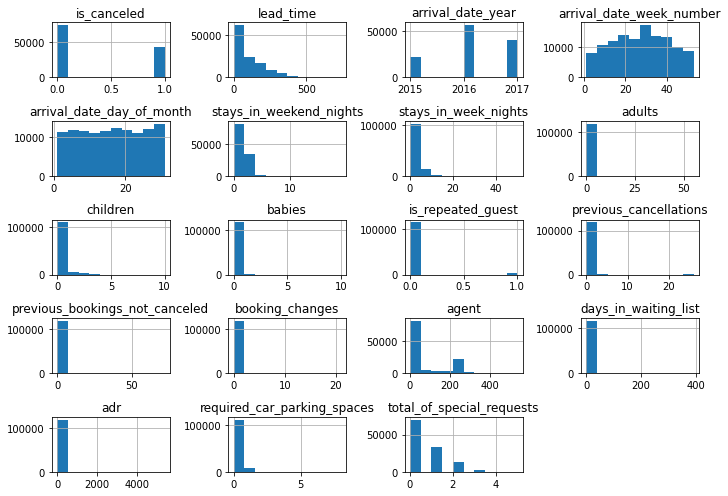

In [10]:
import matplotlib.pyplot as plt

data.hist(figsize=(10,7))
plt.tight_layout()
plt.show()


## Función de Densidad

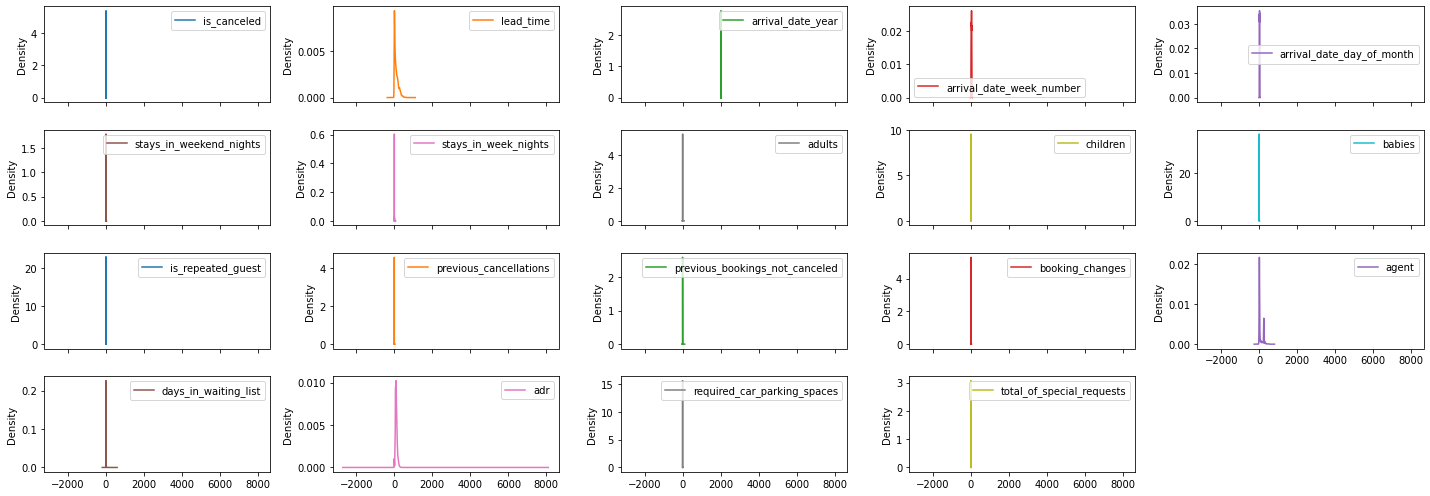

In [11]:
data.plot(kind='density', subplots=True, layout=(4, 5), figsize=(20,7))
plt.tight_layout()
plt.show()


## Boxplot

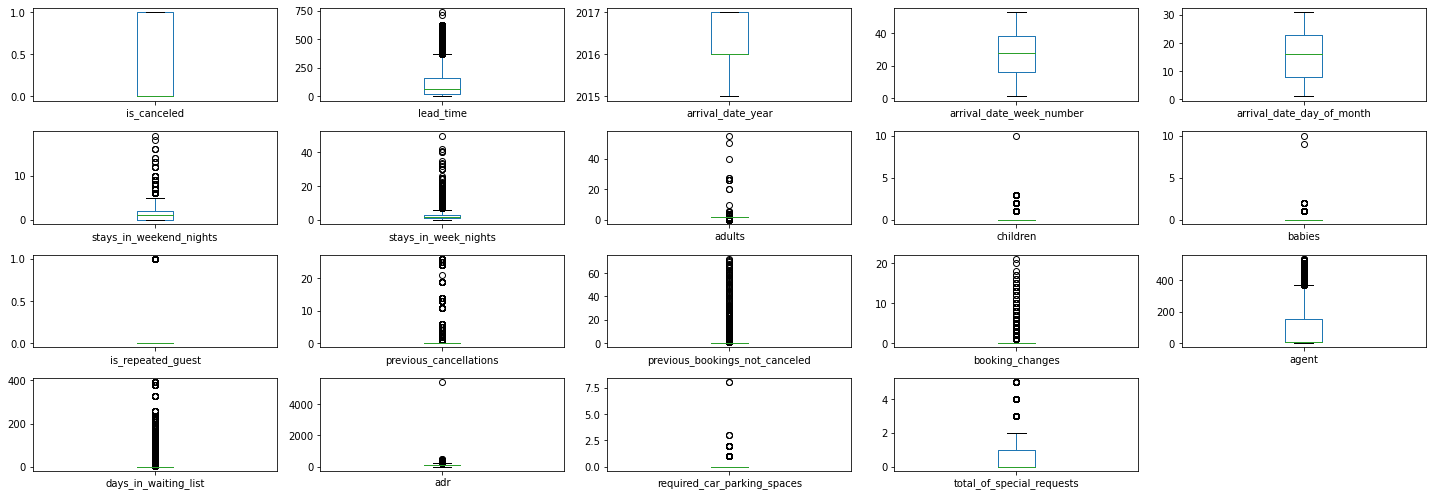

In [12]:
data.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,7))
plt.tight_layout()
plt.show()

## Matriz de correlación

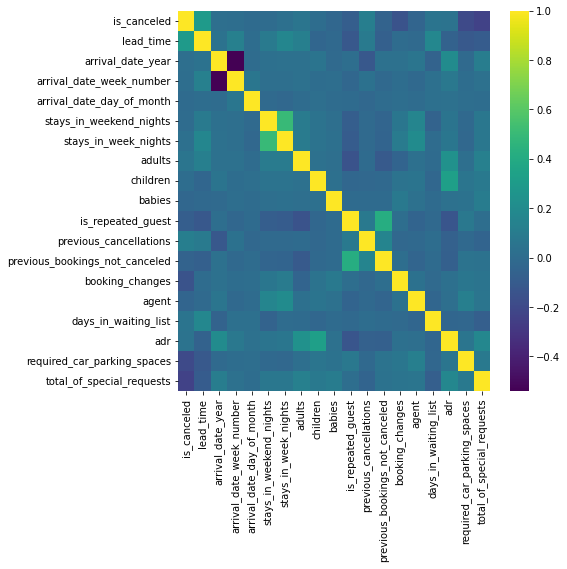

In [13]:
import seaborn as sns

correlation = data.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, cmap='viridis')
plt.show()


## Matriz de dispersión por clase

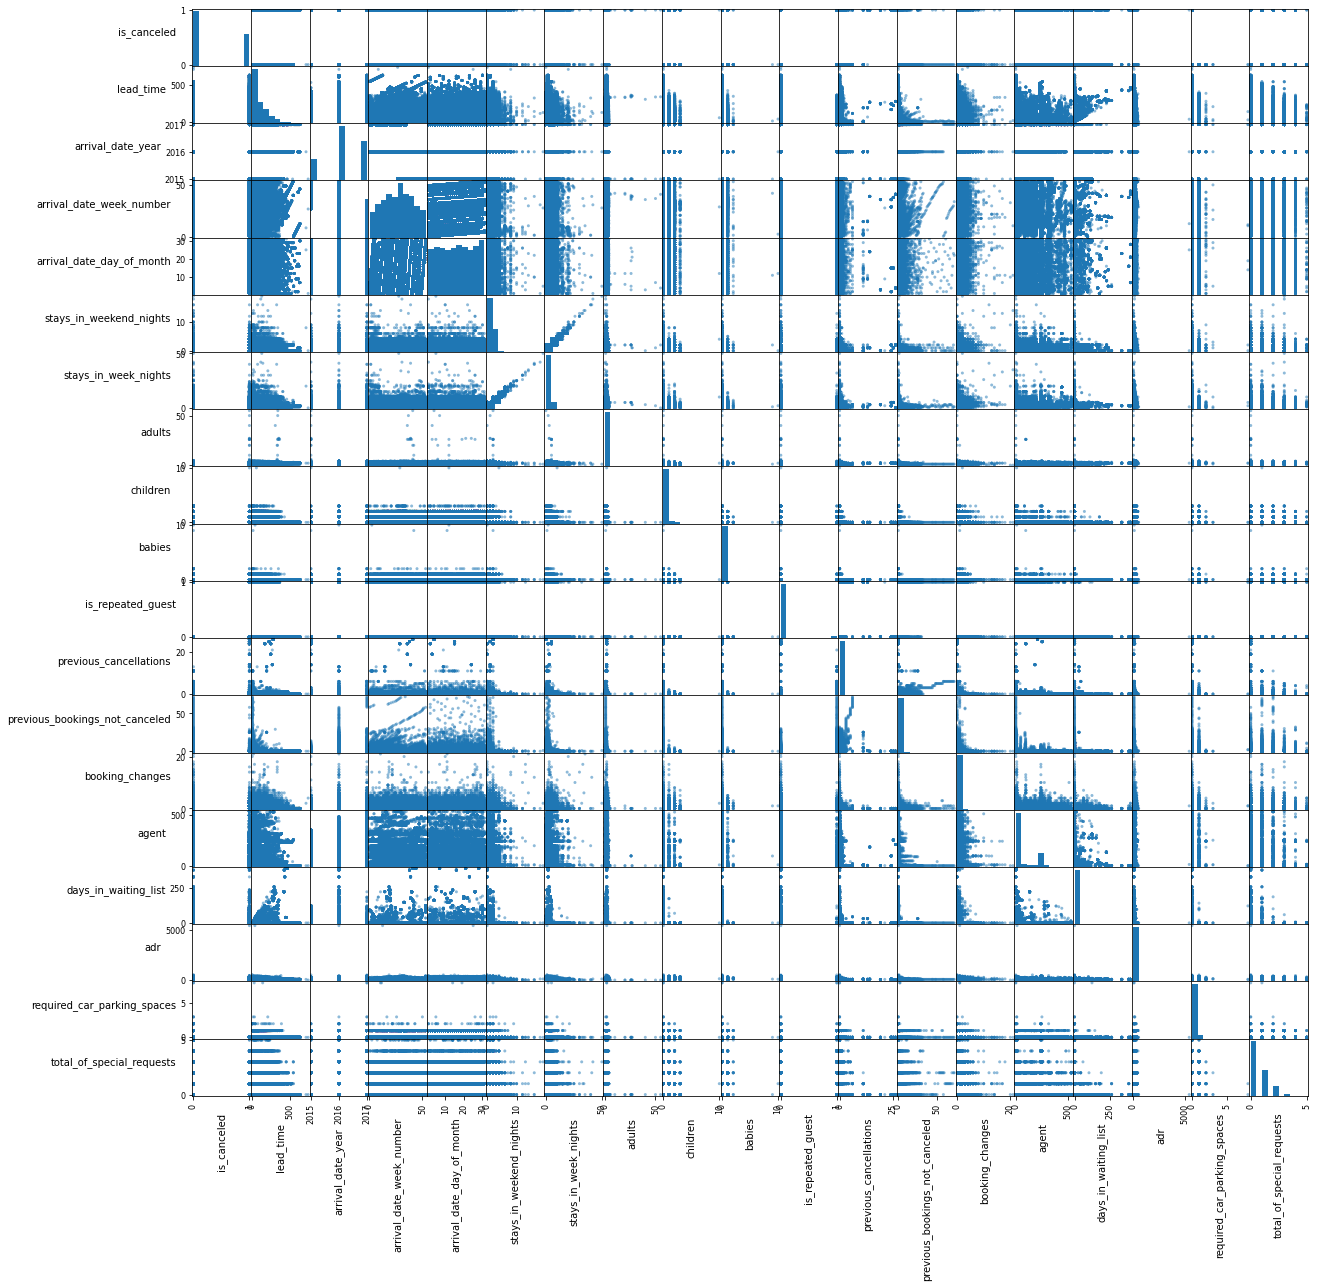

In [14]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(data, figsize=(20, 20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()


# Separar columna binarias de las otras
* **X:** Otras columnas
* **Y:** Columna binaria

In [15]:
array_df = data.values
y = array_df[:, 0]
x = array_df[:, 1:]

# Transformación de datos

## Escalamiento

In [16]:
from sklearn import preprocessing

scale_x = preprocessing.scale(x)
scale_x

array([[ 2.22705112, -1.63476794, -0.01214053, ..., -2.0150382 ,
        -0.25487288, -0.72069411],
       [ 5.9233847 , -1.63476794, -0.01214053, ..., -2.0150382 ,
        -0.25487288, -0.72069411],
       [-0.90781407, -1.63476794, -0.01214053, ..., -0.53093528,
        -0.25487288, -0.72069411],
       ...,
       [-0.65515329,  1.19219514,  0.57587506, ...,  1.10573343,
        -0.25487288,  4.32474574],
       [ 0.0466822 ,  1.19219514,  0.57587506, ...,  0.05083307,
        -0.25487288, -0.72069411],
       [ 0.94503163,  1.19219514,  0.57587506, ...,  0.97691329,
        -0.25487288,  1.80202581]])

## Estandarización

In [17]:
sta_sca_x = preprocessing.scale(x)
sta_sca_x

array([[ 2.22705112, -1.63476794, -0.01214053, ..., -2.0150382 ,
        -0.25487288, -0.72069411],
       [ 5.9233847 , -1.63476794, -0.01214053, ..., -2.0150382 ,
        -0.25487288, -0.72069411],
       [-0.90781407, -1.63476794, -0.01214053, ..., -0.53093528,
        -0.25487288, -0.72069411],
       ...,
       [-0.65515329,  1.19219514,  0.57587506, ...,  1.10573343,
        -0.25487288,  4.32474574],
       [ 0.0466822 ,  1.19219514,  0.57587506, ...,  0.05083307,
        -0.25487288, -0.72069411],
       [ 0.94503163,  1.19219514,  0.57587506, ...,  0.97691329,
        -0.25487288,  1.80202581]])

## Normalización

In [18]:
norm_x = preprocessing.normalize(x)
norm_x

array([[1.67319062e-01, 9.85812605e-01, 1.32093997e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.43473344e-01, 9.39075697e-01, 1.25831483e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.47120815e-03, 9.99212060e-01, 1.33889457e-02, ...,
        3.71915159e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.67983012e-02, 9.96534515e-01, 1.72923689e-02, ...,
        7.79194142e-02, 0.00000000e+00, 1.97627073e-03],
       [5.38233256e-02, 9.95978419e-01, 1.72827192e-02, ...,
        5.15518825e-02, 0.00000000e+00, 0.00000000e+00],
       [1.00808225e-01, 9.91854587e-01, 1.72111604e-02, ...,
        7.43522130e-02, 0.00000000e+00, 9.83494880e-04]])

## Yeo johnson

In [19]:
pt_yj_x = preprocessing.power_transform(x, standardize=False)
pt_yj_x


C:\Python38\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


array([[14.5103847 ,         inf, 17.09154684, ...,  0.        ,
        -0.        , -0.        ],
       [18.77697504,         inf, 17.09154684, ...,  0.        ,
        -0.        , -0.        ],
       [ 2.80790375,         inf, 17.09154684, ..., 21.1129946 ,
        -0.        , -0.        ],
       ...,
       [ 6.03955732,         inf, 21.22533478, ..., 33.91369596,
        -0.        ,  0.59182829],
       [ 9.62846035,         inf, 21.22533478, ..., 26.10178546,
        -0.        , -0.        ],
       [12.13176437,         inf, 21.22533478, ..., 33.02247814,
        -0.        ,  0.52757226]])

# Validación cruzada

In [20]:
from sklearn.model_selection import cross_val_score  # Metodo de validación
from sklearn.linear_model import LogisticRegression  # Modelo matemático

model = LogisticRegression(solver="lbfgs", max_iter=5000)
results = cross_val_score(model, x, y)
mean_p = results.mean()*100.0
std_p = results.std()
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}")


Accuracy: 65.84% 0.04


## Validación cruzada con repeticiones

In [21]:
from sklearn.model_selection import cross_val_score  # Metodo de validación
from sklearn.model_selection import KFold  # Iteraciones
from sklearn.linear_model import LogisticRegression  # Modelo matemático

num_folds = 10
kfold = KFold(n_splits=num_folds)
model = LogisticRegression(solver="lbfgs", max_iter=5000)
results = cross_val_score(model, x, y, cv=kfold)
mean_p = results.mean()*100.0
std_p = results.std()
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}")


Accuracy: 63.11% 0.25


## División por porcentaje

In [22]:
from sklearn.model_selection import train_test_split  # División por porcentaje
from sklearn.linear_model import LogisticRegression  # Modelo matemático

test_size = .33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
model = LogisticRegression(solver="lbfgs", max_iter=4000)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
mean_p = results.mean()*100.0
std_p = results.std()
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}")

Accuracy: 73.78% 0.00


## División por porcentaje repetidos aleatoriamente

In [23]:
from sklearn.model_selection import train_test_split  # División por porcentaje
from sklearn.linear_model import LogisticRegression  # Modelo matemático

test_size = .33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=True)
model = LogisticRegression(solver="lbfgs", max_iter=4000)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
mean_p = results.mean()*100.0
std_p = results.std()
print(f"Accuracy: {mean_p:,.2f}% {std_p:,.2f}")

Accuracy: 73.74% 0.00


# Métricas para evaluación de Algoritmos

## Matriz de confusión

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

test_size = .33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=1900)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[21907  2976]
 [ 7342  7174]]


## Kappa de Cohen

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

test_size = .33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=1900)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
cohen_score = cohen_kappa_score(y_test, predicted)
print(f"{cohen_score:.2f}")


0.40


## Curva AUC

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=4000)
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"AUC: {results.mean()*100:,.2f}% {results.std():,.2f}")


AUC: 79.13% 0.00


## Curva ROC

In [34]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 1
test_size = .33
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(x_train, y_train)
y_score = model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
print(f"FPR: {fpr.mean()*100:,.2f}% {fpr.std():,.2f}")
print(f"TPR: {tpr.mean()*100:,.2f}% {tpr.std():,.2f}")


FPR: 34.39% 0.26
TPR: 67.03% 0.25
